# Minimizing Churn Rate Through Analysis of Financial Habits

## Introduction

Subscription Products often are the main source of revenue for companies across all industries. These products can come in the form of a ‘one size fits all' overcompassing subscription, or in multi-level memberships. Regardless of how they structure their memberships, or what industry they are in, companies almost always try to minimize customer churn (a.k.a. subscription cancellations). To retain their customers, these companies first need to identify behavioral patterns that act as catalyst in disengagement with the product.

- Market: The target audience is the entirety of a company's subscription base. They are the ones companies want to keep.

- Product: The subscription products that customers are already enrolled in can provide value that users may not have imagined, or that they may have forgotten.

- Goal: The objective of this model is to predict which users are likely to churn, so that the company can focus on re engaging these users with the product. These efforts can be email reminders about the benefits of the product. especially focusing on features that are new or that the user has shown to value.

## Business Challenge:
In this Case Study we will be working for a ﬁntech company that provides a subscription product to its users, which allows them to manage their bank accounts (saving accounts, credit cards, etc). provides them with personalized coupons, informs them of the latest low APR loans available in the market, and educates them on the best available methods to save money (like videos on saving money on taxes, free courses on financial health. etc).

We are in charge of identifying users who are likely to cancel their subscription so that we can start building new features that they may be interested in. These features can increase the engagement and interest of our users towards the products.


## Data Overview:
By subscribing to the membership. our customers have provided us with data on their finances. as well as how they handle those finances through the product. We also have some demographic information we acquired from them during the sign—up process.

Financial data can often be unreliable and delayed. As a result. companies can sometimes build their marketing models using only demographic data. and data related to ﬁnances handled through the product itself. Therefore. we will be restricting ourselves to only using that type of data. Furthermore, product-related data is more indicative of what new features we should be creating as a company.

## Description of each Columns :
<br> userid - MongoDB userid
<br> churn - Active = No | Suspended < 30 = No Else Churn = Yes
<br> age - age of the customer
<br> city - city of the customer
<br> state - state where the customer lives
<br> postal_code - zip code of the customer
<br> zodiac_sign - zodiac sign of the customer
<br> rent_or_own - Does the customer rents or owns a house
<br> more_than_one_mobile_device - does the customer use more than one mobile device
<br> payFreq - Pay Frequency of the cusomter
<br> in_collections - is the customer in collections
<br> loan_pending - is the loan pending
<br> withdrawn_application - has the customer withdrawn the loan applicaiton
<br> paid_off_loan - has the customer paid of the loan
<br> did_not_accept_funding - customer did not accept funding
<br> cash_back_engagement - Sum of cash back dollars received by a customer / No of days in the app
<br> cash_back_amount - Sum of cash back dollars received by a customer
<br> used_ios - Has the user used an iphone
<br> used_android - Has the user used a android based phone
<br> has_used_mobile_and_web - Has the user used mobile and web platforms
<br> has_used_web - Has the user used MoneyLion Web app
<br> has_used_mobile - as the user used MoneyLion app
<br> has_reffered - Has the user referred
<br> cards_clicked - How many times a user has clicked the cards
<br> cards_not_helpful - How helpful was the cards
<br> cards_helpful - How helpful was the cards
<br> cards_viewed - How many times a user viewed the cards
<br> cards_share - How many times a user shared his cards
<br> trivia_view_results - How many times a user viewed trivia results
<br> trivia_view_unlocked - How many times a user viewed trivia view unlocked screen
<br> trivia_view_locked - How many times a user viewed trivia view locked screen
<br> trivia_shared_results - How many times a user shared trivia results
<br> trivia_played - How many times a user played trivia
<br> re_linked_account - Has the user re linked account
<br> un_linked_account - Has the user un linked account
<br> credit_score - Customer's credit score

## Importing Libraries

In [1]:
import pickle
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import random
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Users who were 60 days enrolled, churn in the next 30
churn_data = pd.read_csv("churn_data.csv")

## Exploratory Data Analysis

In [4]:
pd.options.display.max_columns = 999

churn_data.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0


In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_application_begin     27000 non-null  int64  
 14  app_downloaded        

In [6]:
churn_data.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,0.050630,0.013111,8.197852,0.952481,0.606074,0.561741,0.393926,0.587259,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,0.871366,0.238158,12.497243,0.212749,0.488628,0.496183,0.488628,0.492336,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [7]:
# Determine if ANY Value in a Series is Missing
churn_data.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [8]:
#Count Missing Values in DataFrame
churn_data.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [9]:
churn_data[churn_data.age.isnull()]

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
1714,64739,0,NaN,na,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,na,0,0,NaN,0.0,0
3237,65117,0,NaN,na,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Semi-Monthly,0,0,0,0,na,0,0,NaN,0.0,0
12571,62702,0,NaN,na,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,na,0,0,NaN,0.0,1
15722,61631,0,NaN,na,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,na,0,0,NaN,0.0,1


In [10]:
churn_data = churn_data[churn_data.age.notnull()]

In [11]:
churn_data.isna().sum()

user                          0
churn                         0
age                           0
housing                       0
credit_score               8027
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3223
reward_rate                   0
is_referred                   0
dtype: i

In [12]:
churn_data = churn_data.drop(columns=["credit_score", "rewards_earned"])

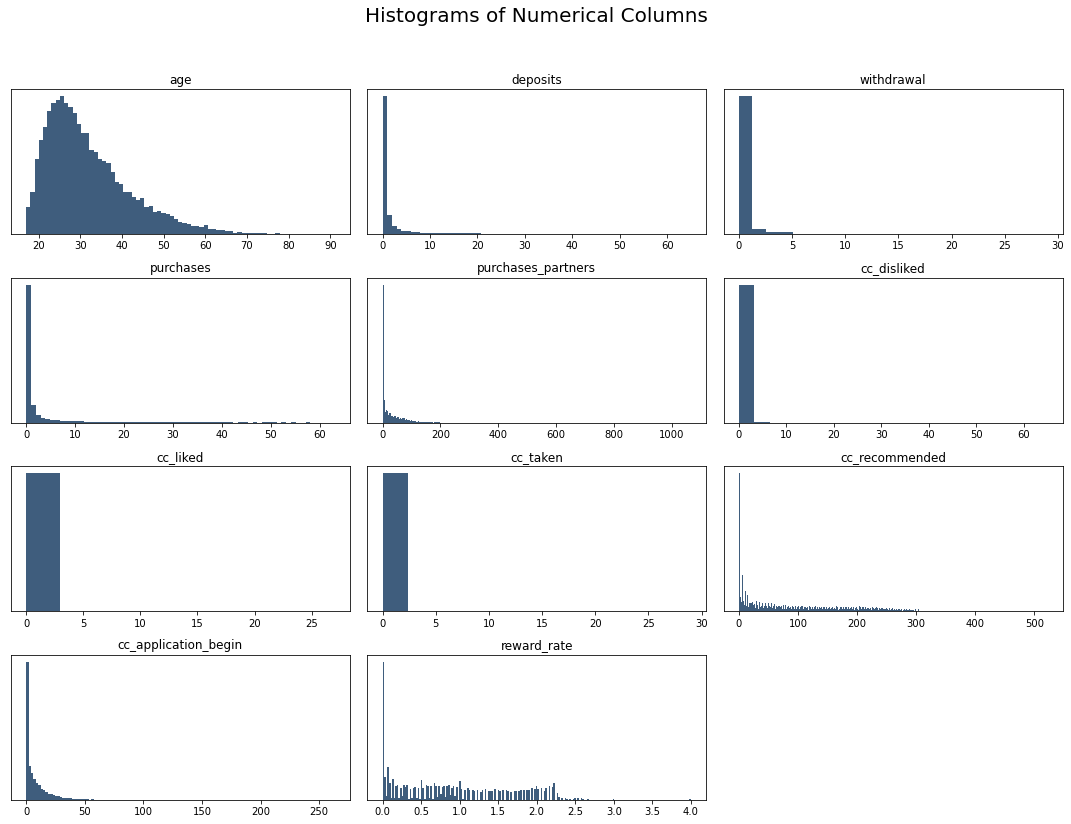

In [13]:
## Histograms
num_col_data = churn_data[["age", "deposits", "withdrawal", "purchases", "purchases_partners", "cc_disliked", "cc_liked", "cc_taken", "cc_recommended", "cc_application_begin", "reward_rate"]]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, num_col_data.shape[1] + 1):
    plt.subplot(4, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(num_col_data.columns.values[i - 1])

    vals = np.size(num_col_data.iloc[:, i - 1].unique())
    
    plt.hist(num_col_data.iloc[:, i - 1], bins=vals, color='#3F5D7D');
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

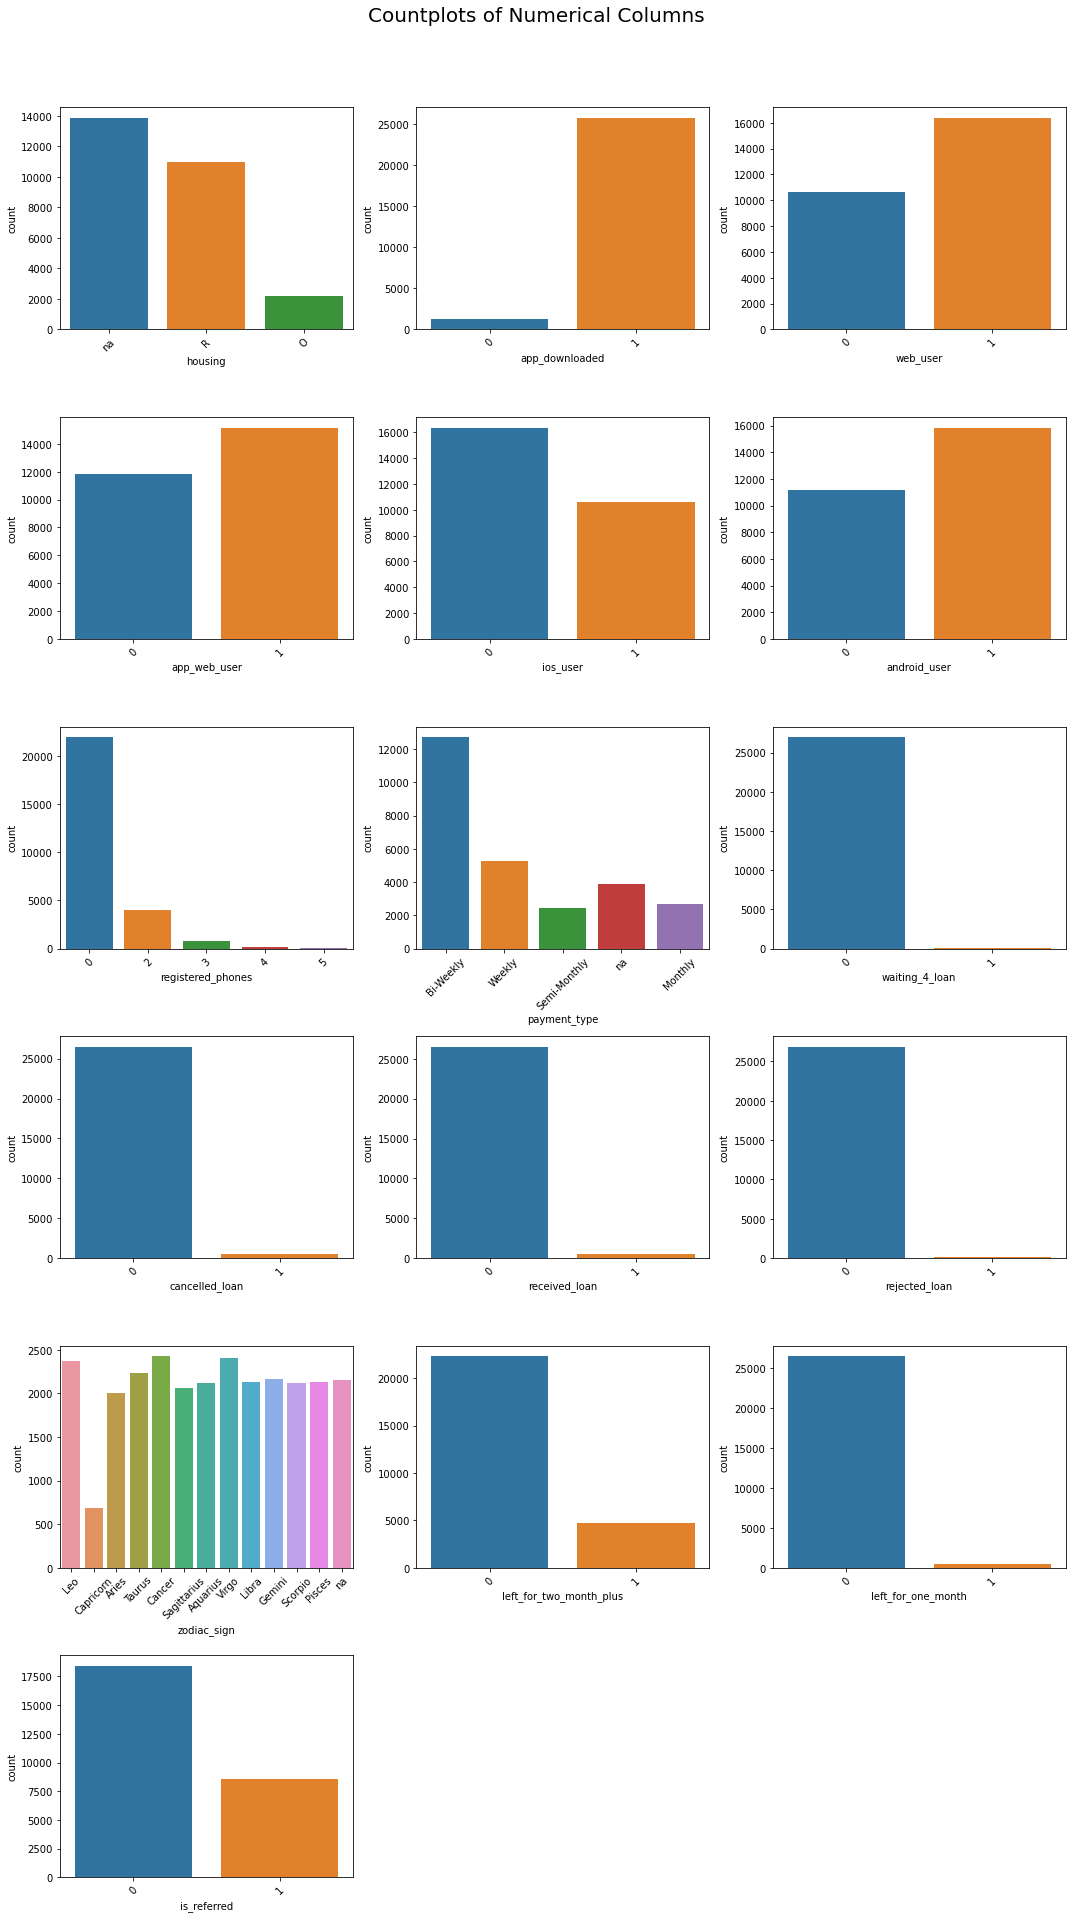

In [14]:
bin_data = churn_data[["housing", "app_downloaded", "web_user", "app_web_user",
                    "ios_user", "android_user", "registered_phones", "payment_type",
                    "waiting_4_loan", "cancelled_loan", "received_loan", "rejected_loan",
                    "zodiac_sign", "left_for_two_month_plus", "left_for_one_month", "is_referred"]]
fig = plt.figure(figsize=(15, 28))
plt.suptitle('Countplots of Numerical Columns', fontsize=20)

for i in range(1, bin_data.shape[1] + 1):
    plt.subplot(6, 3, i)
    plt.subplots_adjust(wspace=0.4)
    sns.countplot(bin_data.iloc[:, i-1] , label="count")
    plt.xticks(rotation=45)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

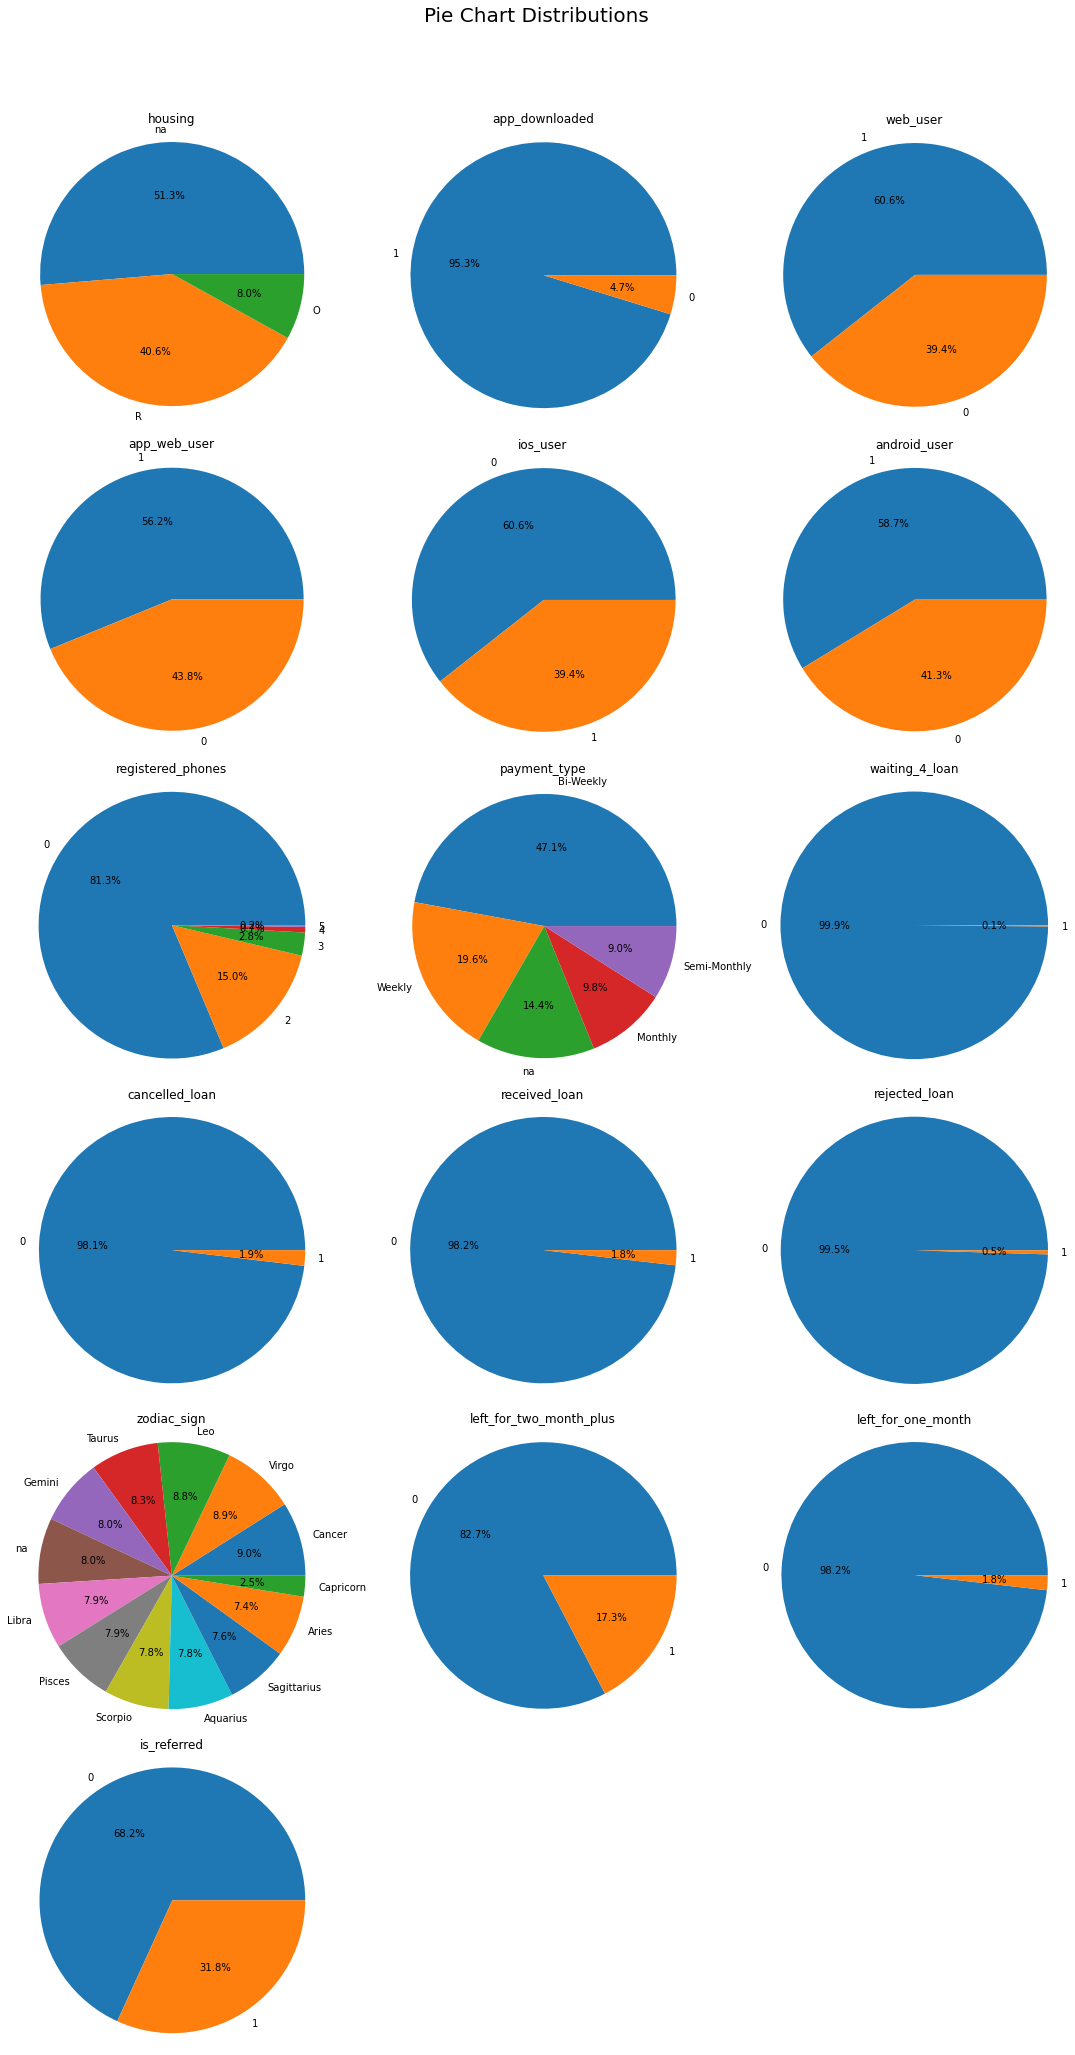

In [15]:
## Pie Plots
fig = plt.figure(figsize=(15, 30))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, bin_data.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(bin_data.columns.values[i - 1])
   
    values = bin_data.iloc[:, i - 1].value_counts(normalize = True).values
    index = bin_data.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [16]:
churn_data[bin_data.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [17]:
churn_data[bin_data.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [18]:
churn_data[bin_data.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [19]:
churn_data[bin_data.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [20]:
churn_data[bin_data.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

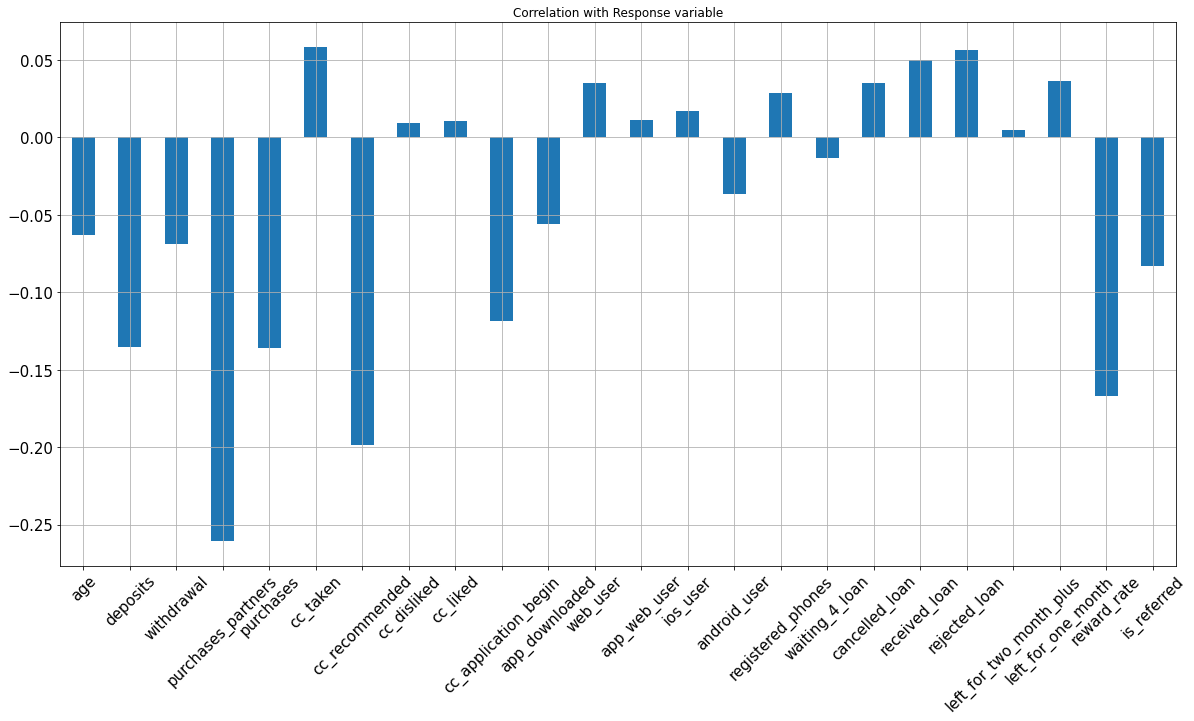

In [21]:
## Correlation with Response Variable
churn_data.drop(columns = ["user", "churn", "housing", "payment_type", "zodiac_sign"]
    ).corrwith(churn_data.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True);

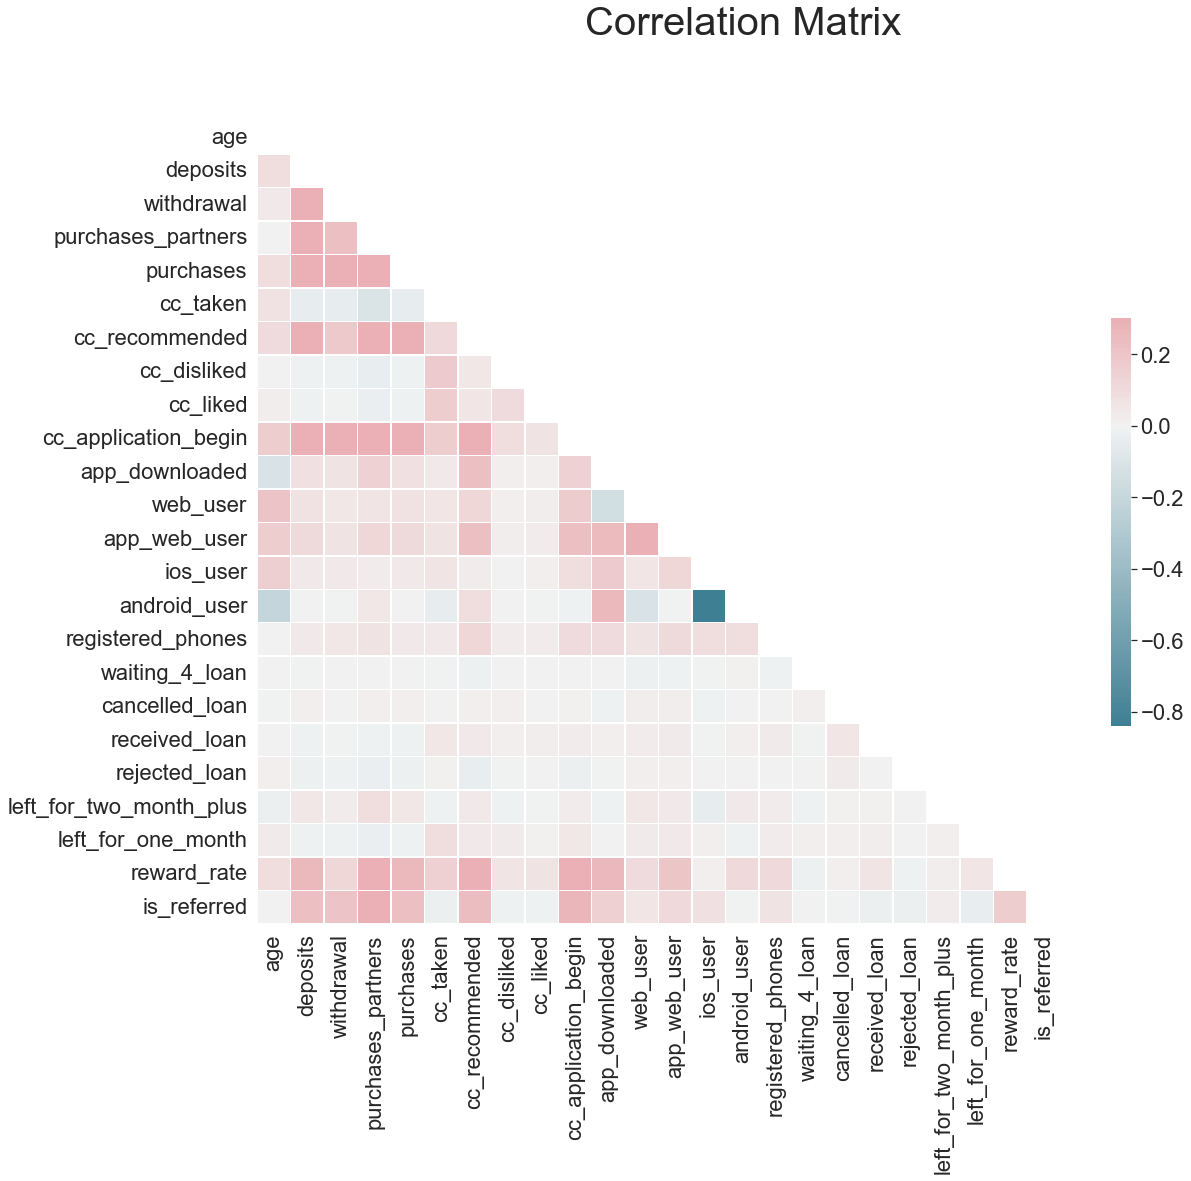

In [22]:
## Correlation Matrix
sns.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = churn_data.drop(columns = ["user", "churn"]).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [23]:
# Removing Correlated Fields
churn_data = churn_data.drop(columns = ["app_web_user"])

In [24]:
## Note: Although there are somewhat correlated fields, they are not colinear
## These feature are not functions of each other, so they won't break the model
## But these feature won't help much either. Feature Selection should remove them.

In [25]:
churn_data.to_csv('clean_churn_data.csv', index = False)

## Data Preprocessing

In [26]:
churn_data = pd.read_csv("clean_churn_data.csv")

In [27]:
churn_data.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,0,0,0,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,0,0,5,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,0,0,9,1,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,0,0,26,1,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,0,0,0,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [28]:
user_id = churn_data["user"]

In [29]:
user_id.head()

0    55409
1    23547
2    58313
3     8095
4    61353
Name: user, dtype: int64

In [30]:
churn_data = churn_data.drop(columns = ["user"])

In [31]:
churn_data.head()

,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,0,37.0,na,0,0,0,0,0,0,0,0,0,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,0,28.0,R,0,0,1,0,0,96,0,0,5,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,0,35.0,R,47,2,86,47,0,285,0,0,9,1,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,0,26.0,R,26,3,38,25,0,74,0,0,26,1,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,1,27.0,na,0,0,2,0,0,0,0,0,0,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [32]:
# One-Hot Encoding
churn_data = pd.get_dummies(churn_data)

In [33]:
churn_data.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [34]:
churn_data = churn_data.drop(columns = ["housing_na", "payment_type_na", "zodiac_sign_na"])

## Splitting the dataset into the Training set and Test set

In [35]:
# Splitting Independent and Response Variables
# Let's drop the target label coloumns
X = churn_data.drop(["churn"], axis=1)

In [36]:
X.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
0,37.0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,28.0,0,0,1,0,0,96,0,0,5,1,1,1,0,0,0,0,0,0,0,0,1.47,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,35.0,47,2,86,47,0,285,0,0,9,1,0,0,1,2,0,0,0,0,1,0,2.17,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,26.0,26,3,38,25,0,74,0,0,26,1,0,0,1,0,0,0,0,0,0,0,1.10,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,27.0,0,0,2,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0.03,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [37]:
y = churn_data["churn"]

In [38]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: churn, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
X_train.shape, X_test.shape

((21596, 41), (5400, 41))

In [42]:
y_train.shape, y_test.shape

((21596,), (5400,))

## Balancing the Training Set (Down-sample Majority Class)

In [43]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [44]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [45]:
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index 
else:
    higher = neg_index
    lower = pos_index

In [46]:
random.seed(0)

In [47]:
higher = np.random.choice(higher, size=len(lower))

In [48]:
lower = np.asarray(lower)

In [49]:
new_indexes = np.concatenate((lower, higher))

In [50]:
X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

In [51]:
X_train.shape, y_train.shape

((17880, 41), (17880,))

In [52]:
y_train.value_counts()

1    8940
0    8940
Name: churn, dtype: int64

## Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
X_train2 = pd.DataFrame(scaler.fit_transform(X_train))
X_test2 = pd.DataFrame(scaler.fit_transform(X_test))

In [56]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

In [57]:
X_train2.index = X_train.index.values 
X_test2.index = X_test.index.values

In [58]:
X_train = X_train2
X_test = X_test2 

In [59]:
X_train.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11695,-0.622951,-0.361279,-0.292129,-0.584113,-0.360768,-0.166544,-0.911133,-0.060378,-0.070135,-0.570227,0.224511,-1.250964,-0.820880,0.854524,-0.47017,-0.031745,-0.143751,-0.140267,-0.074995,-0.452875,-0.140681,-0.519990,-0.677668,-0.295175,1.210730,-0.941316,-0.332193,-0.316179,2.015867,3.459179,-0.284977,-0.30776,-0.159576,-0.293605,-0.30863,-0.296405,-0.292817,-0.289427,-0.297743,-0.297186,-0.314893
19766,-0.421549,-0.361279,-0.292129,-0.631648,-0.360768,-0.166544,0.314755,1.165005,-0.070135,-0.570227,0.224511,0.799383,-0.820880,0.854524,-0.47017,-0.031745,-0.143751,-0.140267,-0.074995,-0.452875,-0.140681,0.948502,-0.677668,-0.295175,-0.825948,1.062342,-0.332193,-0.316179,-0.496064,-0.289086,-0.284977,-0.30776,-0.159576,-0.293605,-0.30863,3.373762,-0.292817,-0.289427,-0.297743,-0.297186,-0.314893
8354,0.283360,-0.361279,-0.292129,-0.631648,-0.360768,-0.166544,1.994676,-0.060378,-0.070135,-0.249369,0.224511,0.799383,-0.820880,0.854524,-0.47017,-0.031745,-0.143751,-0.140267,-0.074995,-0.452875,-0.140681,1.389049,-0.677668,-0.295175,-0.825948,-0.941316,-0.332193,-0.316179,-0.496064,-0.289086,-0.284977,-0.30776,-0.159576,-0.293605,-0.30863,-0.296405,-0.292817,-0.289427,-0.297743,-0.297186,3.175679
17883,0.585464,-0.361279,-0.292129,0.033846,-0.360768,-0.166544,-0.184681,-0.060378,-0.070135,-0.008726,0.224511,0.799383,1.218205,-1.170242,-0.47017,-0.031745,-0.143751,-0.140267,-0.074995,-0.452875,-0.140681,-0.653489,1.475648,-0.295175,1.210730,-0.941316,-0.332193,-0.316179,2.015867,-0.289086,-0.284977,-0.30776,-0.159576,-0.293605,-0.30863,-0.296405,-0.292817,-0.289427,-0.297743,3.364898,-0.314893
25149,-0.824354,-0.247574,-0.292129,-0.108760,-0.244955,-0.166544,-0.581959,-0.060378,-0.070135,-0.249369,0.224511,-1.250964,1.218205,-1.170242,-0.47017,-0.031745,-0.143751,-0.140267,-0.074995,-0.452875,-0.140681,-0.560040,1.475648,-0.295175,1.210730,-0.941316,-0.332193,-0.316179,2.015867,-0.289086,-0.284977,-0.30776,-0.159576,-0.293605,-0.30863,-0.296405,3.415097,-0.289427,-0.297743,-0.297186,-0.314893


In [60]:
X_test.head()

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
2834,0.004040,0.868055,-0.291026,-0.655340,0.894374,2.335414,1.227740,-0.058114,-0.039498,1.861847,0.228071,-1.229958,-0.798035,0.836171,-0.451170,-0.036027,-0.135954,-0.133819,-0.072196,-0.466168,-0.134535,0.946899,-0.672312,-0.28853,-0.817757,-0.934371,-0.327472,-0.319438,2.028210,-0.292279,-0.282843,-0.329203,-0.170762,-0.295625,-0.309123,-0.280929,-0.293025,3.584153,-0.285127,-0.304062,-0.311275
21018,-0.706304,-0.360500,-0.291026,2.488687,-0.360310,-0.182804,1.693278,-0.058114,-0.039498,-0.406119,0.228071,0.813036,-0.798035,0.836171,-0.451170,-0.036027,-0.135954,-0.133819,13.851251,-0.466168,-0.134535,1.080898,-0.672312,-0.28853,1.222857,1.070239,-0.327472,-0.319438,-0.493046,-0.292279,-0.282843,-0.329203,-0.170762,3.382661,-0.309123,-0.280929,-0.293025,-0.279006,-0.285127,-0.304062,-0.311275
5590,1.526208,0.868055,1.672175,-0.680096,0.894374,-0.182804,0.421564,2.199566,-0.039498,2.185842,0.228071,-1.229958,-0.798035,0.836171,-0.451170,-0.036027,-0.135954,-0.133819,-0.072196,-0.466168,-0.134535,0.946899,1.487405,-0.28853,1.222857,1.070239,-0.327472,-0.319438,-0.493046,-0.292279,-0.282843,-0.329203,-0.170762,-0.295625,-0.309123,-0.280929,-0.293025,-0.279006,-0.285127,3.288798,-0.311275
15769,0.105518,-0.360500,-0.291026,-0.482047,-0.360310,-0.182804,-1.009114,-0.058114,-0.039498,-0.568116,0.228071,-1.229958,1.253078,-1.195928,1.831094,-0.036027,-0.135954,-0.133819,-0.072196,-0.466168,-0.134535,-0.527094,1.487405,-0.28853,-0.817757,-0.934371,-0.327472,-0.319438,2.028210,-0.292279,-0.282843,-0.329203,5.856118,-0.295625,-0.309123,-0.280929,-0.293025,-0.279006,-0.285127,-0.304062,-0.311275
15120,-1.010738,0.309621,-0.291026,3.206614,0.324063,-0.182804,1.727342,-0.058114,-0.039498,2.104843,0.228071,0.813036,1.253078,-1.195928,-0.451170,-0.036027,-0.135954,-0.133819,-0.072196,2.145148,-0.134535,1.348897,1.487405,-0.28853,1.222857,1.070239,-0.327472,-0.319438,-0.493046,-0.292279,-0.282843,-0.329203,-0.170762,-0.295625,3.234960,-0.280929,-0.293025,-0.279006,-0.285127,-0.304062,-0.311275


## Model Building

### Comparing Models

#### Logistic Regression

In [61]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression

In [62]:
lr = LogisticRegression(random_state=0)

In [63]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [64]:
# Predicting Test Set
y_pred = lr.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

In [66]:
cm = confusion_matrix(y_test, y_pred)

In [67]:
acc = accuracy_score(y_test, y_pred)
acc

0.6116666666666667

In [68]:
prec = precision_score(y_test, y_pred) # tp / (tp + fp)
prec

0.5210834102800862

In [69]:
rec = recall_score(y_test, y_pred) # tp / (tp + fn)
rec

0.7578334825425246

In [70]:
f1 = f1_score(y_test, y_pred)
f1

0.6175451395221594

Test Data Accuracy: 0.6117


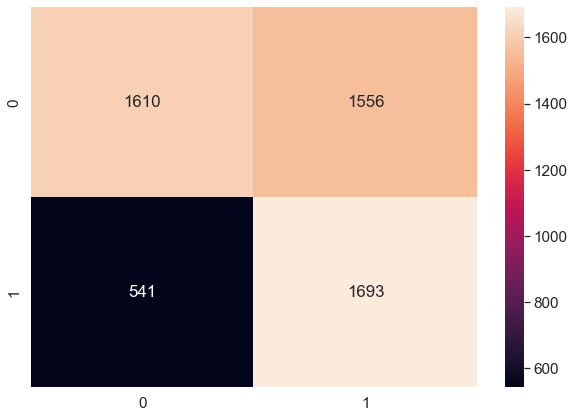

In [71]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % acc)

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.51      0.61      3166
           1       0.52      0.76      0.62      2234

    accuracy                           0.61      5400
   macro avg       0.63      0.63      0.61      5400
weighted avg       0.65      0.61      0.61      5400



In [73]:
results = pd.DataFrame([["Logistic Regression", acc, prec, rec, f1]],
               columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

In [74]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.611667,0.521083,0.757833,0.617545


#### Support Vector Machine

In [75]:
from sklearn.svm import SVC
svm = SVC(random_state = 0, kernel = 'rbf')
svm.fit(X_train, y_train)

SVC(random_state=0)

In [76]:
# Predicting Test Set
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Test Data Accuracy: 0.6233


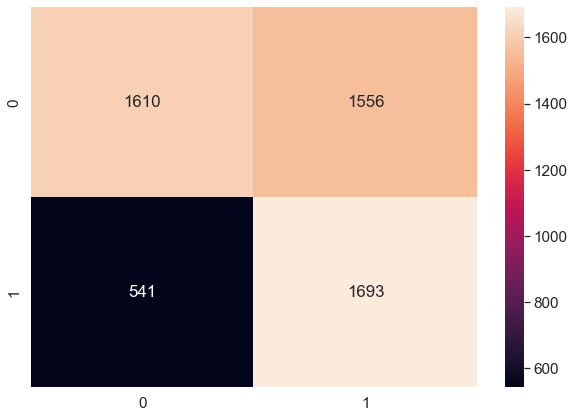

In [77]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % acc)

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.53      0.62      3166
           1       0.53      0.76      0.62      2234

    accuracy                           0.62      5400
   macro avg       0.64      0.64      0.62      5400
weighted avg       0.66      0.62      0.62      5400



In [79]:
model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [80]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.611667,0.521083,0.757833,0.617545
1,SVM (RBF),0.623333,0.531506,0.755148,0.623891


#### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [82]:
# Predicting Test Set
y_pred_rf = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

Test Data Accuracy: 0.6594


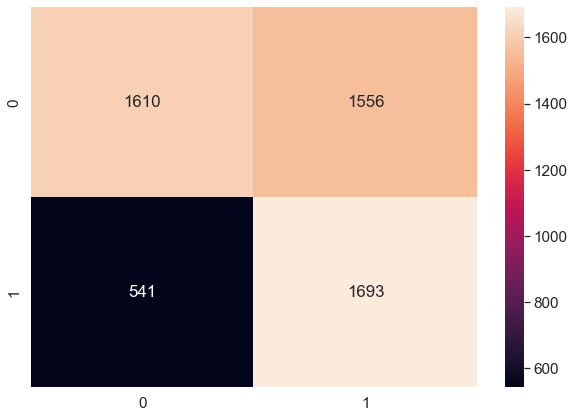

In [83]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % acc)

In [84]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.77      0.60      0.67      3166
           1       0.57      0.75      0.65      2234

    accuracy                           0.66      5400
   macro avg       0.67      0.67      0.66      5400
weighted avg       0.69      0.66      0.66      5400



In [85]:
model_results = pd.DataFrame([["Random Forest (n=100)", acc, prec, rec, f1]],
               columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

results = results.append(model_results, ignore_index = True)

In [86]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.611667,0.521083,0.757833,0.617545
1,SVM (RBF),0.623333,0.531506,0.755148,0.623891
2,Random Forest (n=100),0.659444,0.567017,0.747986,0.645049


## Applying K-Fold Cross Validation

In [87]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(rf, X_train, y_train, cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.78 (+/- 0.02)


In [88]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

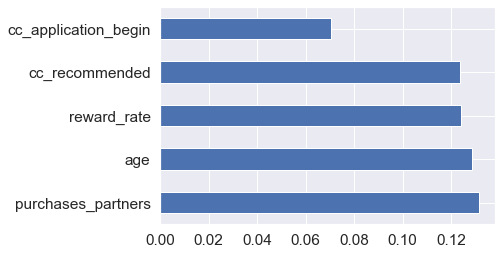

In [89]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest().plot(kind='barh');

## Feature Selection

### Recursive Feature Elimination


In [90]:
from sklearn.feature_selection import RFE

In [91]:
# Select Best X Features
rfe = RFE(rf, 20)
rfe = rfe.fit(X_train, y_train)

In [92]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True False  True False False  True False  True
  True  True  True False False False False  True False  True  True False
  True  True False False  True False False False False False  True False
 False False False  True  True]
[ 1  1  1  1  1 13  1 17 20  1 19  1  1  1  1 22 16 15 21  1 18  1  1 12
  1  1  8 10  1  4 11  5 14  3  1  9  7  6  2  1  1]


In [93]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_recommended', 'cc_application_begin', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'left_for_two_month_plus',
       'reward_rate', 'is_referred', 'housing_R', 'payment_type_Bi-Weekly',
       'payment_type_Weekly', 'zodiac_sign_Leo', 'zodiac_sign_Taurus',
       'zodiac_sign_Virgo'],
      dtype='object')

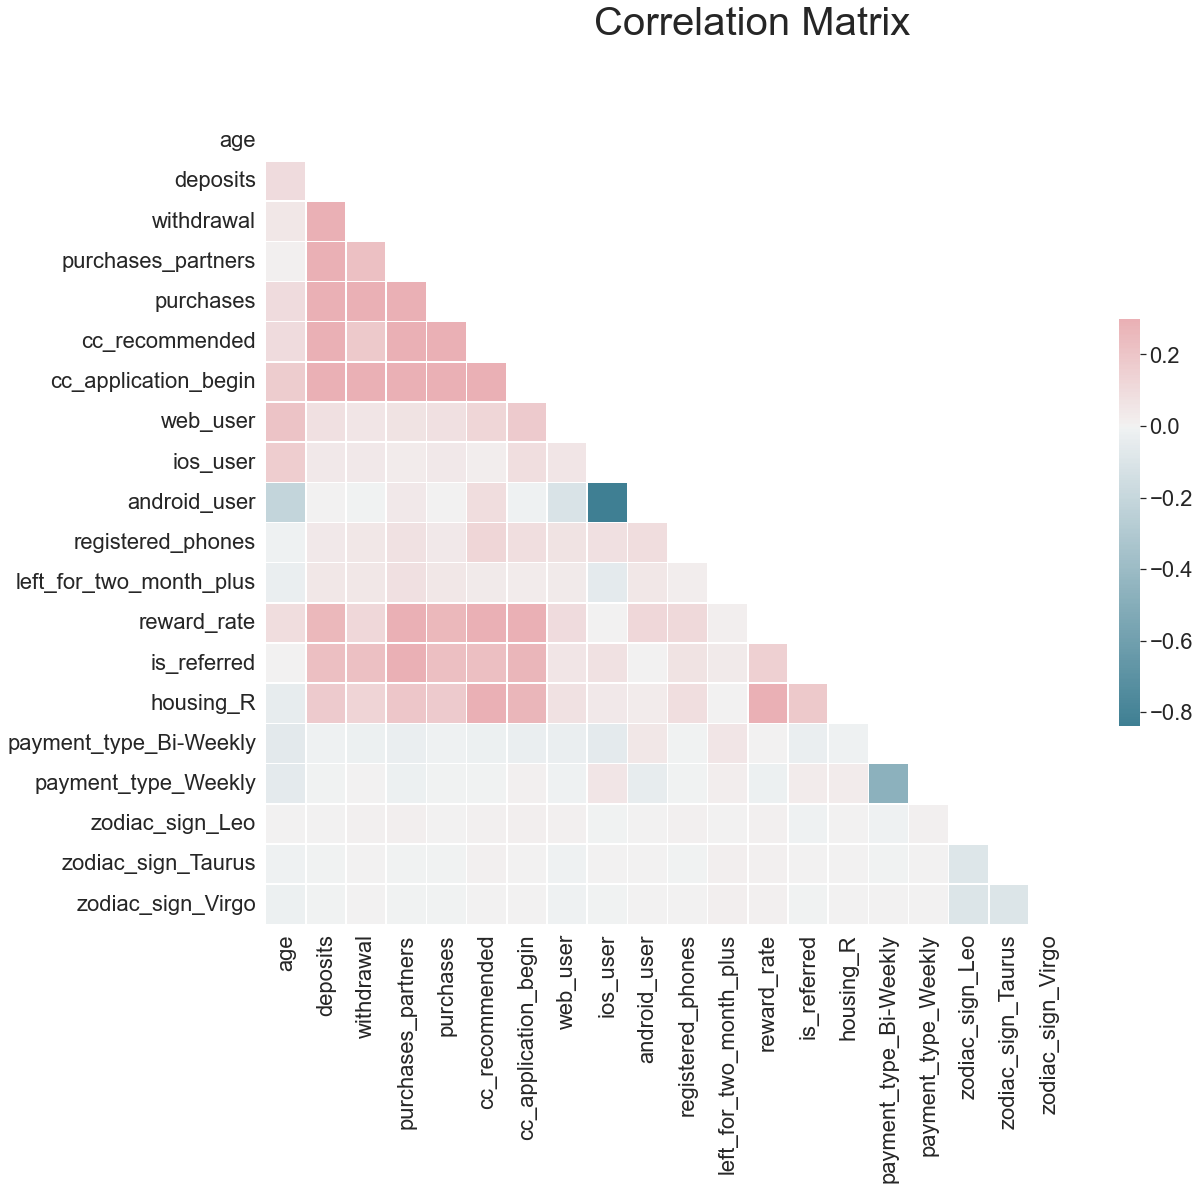

In [94]:
# New Correlation Matrix
sns.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = X_train[X_train.columns[rfe.support_]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [95]:
## Randomforest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest after new Feature selection', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

Test Data Accuracy: 0.6574


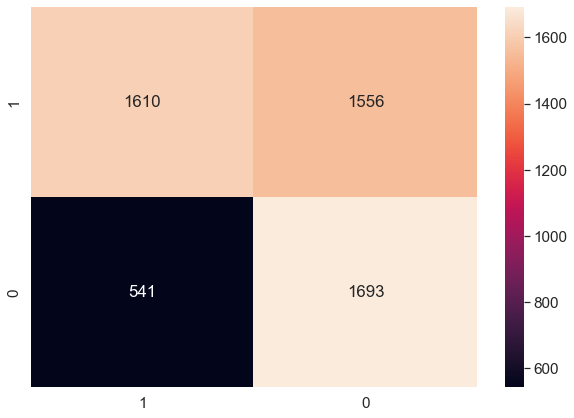

In [96]:
df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.60      0.67      3166
           1       0.57      0.73      0.64      2234

    accuracy                           0.66      5400
   macro avg       0.66      0.67      0.66      5400
weighted avg       0.68      0.66      0.66      5400



In [98]:
results 

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.611667,0.521083,0.757833,0.617545
1,SVM (RBF),0.623333,0.531506,0.755148,0.623891
2,Random Forest (n=100),0.659444,0.567017,0.747986,0.645049
3,Random Forest after new Feature selection,0.657407,0.566390,0.733214,0.639095


## Formatting Final Results

In [99]:
final_results = pd.concat([y_test, user_id], axis=1).dropna()

In [100]:
final_results["predicted_churn"] = y_pred_rf

In [101]:
final_results = final_results[["user", "churn", "predicted_churn"]].reset_index(drop=True)

In [102]:
final_results.head()

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,1
3,69531,0.0,0
4,25997,0.0,0
